Imports

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Load dataset
data = pd.read_csv('World_University_Rankings_2023.csv')

## Exploration  
Questions: What is the primary target variable (i.e., variable to predict).  Are there any interesting secondary variables to predict? 


In [2]:
# Inspect missing values
print("Missing values in each column before removal:\n", data.isnull().sum())
print('Size of data:',len(data),'\n-----------------------------------------------------------')

# Remove rows with missing values
data.dropna(inplace=True)

# Inspect the dataset after removing missing values
print("Missing values in each column after removal:\n", data.isnull().sum())
print('Size of data:',len(data))

Missing values in each column before removal:
 University Rank                  0
Name of University             108
Location                       294
No of student                  132
No of student per staff        133
International Student          132
Female:Male Ratio              213
OverAll Score                  542
Teaching Score                 542
Research Score                 542
Citations Score                542
Industry Income Score          542
International Outlook Score    542
dtype: int64
Size of data: 2341 
-----------------------------------------------------------
Missing values in each column after removal:
 University Rank                0
Name of University             0
Location                       0
No of student                  0
No of student per staff        0
International Student          0
Female:Male Ratio              0
OverAll Score                  0
Teaching Score                 0
Research Score                 0
Citations Score              

In [3]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Displaying information about the dataset
print("\n--------------------------------------------","\nDataset Information:")
print(data.info())

# Displaying value counts for the target variable
print("\n--------------------------------------------","\nValue Counts for the Target Variable 'Rank':")
print(data["University Rank"].value_counts())

First few rows of the dataset:
  University Rank                     Name of University        Location  \
0               1                   University of Oxford  United Kingdom   
1               2                     Harvard University   United States   
2               3                University of Cambridge  United Kingdom   
3               3                    Stanford University   United States   
4               5  Massachusetts Institute of Technology   United States   

  No of student  No of student per staff International Student  \
0        20,965                     10.6                   42%   
1        21,887                      9.6                   25%   
2        20,185                     11.3                   39%   
3        16,164                      7.1                   24%   
4        11,415                      8.2                   33%   

  Female:Male Ratio OverAll Score  Teaching Score  Research Score  \
0           48 : 52          96.4            9

In [4]:
# Change some columns into float / int so they're numerical
# university rank, no of student, international student, female:male ratio, overall score

#Function to convert 'International Student' percentage to float
def safe_float_convert(x):
    try:
        return float(x.rstrip('%')) / 100.0
    except:
        return np.nan

data['International Student'] = data['International Student'].apply(safe_float_convert)

#Function to convert 'Female:Male Ratio' to a numeric ratio
def convert_ratio(ratio):
    try:
        parts = ratio.split(':')
        if len(parts) == 2:
            return float(parts[0]) / float(parts[1])
        else:
            return np.nan
    except:
        return np.nan

data['Female:Male Ratio'] = data['Female:Male Ratio'].apply(convert_ratio)

data['OverAll Score'] = data['OverAll Score'].apply(lambda x: np.mean([float(val) for val in x.split('–')]) if '–' in str(x) else x)
data['OverAll Score'] = pd.to_numeric(data['OverAll Score'], errors='coerce')

data['University Rank'] = data['University Rank'].apply(lambda x: np.mean([float(val) for val in x.split('–')]) if '–' in str(x) else x)
data['University Rank'] = pd.to_numeric(data['University Rank'], errors='coerce')

data['No of student'] = data['No of student'].replace({',': ''}, regex=True)
data['No of student'] = pd.to_numeric(data['No of student'], errors='coerce')


In [5]:
data.isnull().sum()

University Rank                245
Name of University               0
Location                         0
No of student                    0
No of student per staff          0
International Student            1
Female:Male Ratio                6
OverAll Score                    0
Teaching Score                   0
Research Score                   0
Citations Score                  0
Industry Income Score            0
International Outlook Score      0
dtype: int64

In [6]:
data.dropna(inplace=True)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238 entries, 0 to 1443
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   University Rank              1238 non-null   float64
 1   Name of University           1238 non-null   object 
 2   Location                     1238 non-null   object 
 3   No of student                1238 non-null   int64  
 4   No of student per staff      1238 non-null   float64
 5   International Student        1238 non-null   float64
 6   Female:Male Ratio            1238 non-null   float64
 7   OverAll Score                1238 non-null   float64
 8   Teaching Score               1238 non-null   float64
 9   Research Score               1238 non-null   float64
 10  Citations Score              1238 non-null   float64
 11  Industry Income Score        1238 non-null   float64
 12  International Outlook Score  1238 non-null   float64
dtypes: float64(10), in

In [8]:
# Identifying categorical and numeric columns and their distributions
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']

In [9]:
categorical_cols

['Name of University', 'Location']

In [10]:
numeric_cols

['University Rank',
 'No of student',
 'No of student per staff',
 'International Student',
 'Female:Male Ratio',
 'OverAll Score',
 'Teaching Score',
 'Research Score',
 'Citations Score',
 'Industry Income Score',
 'International Outlook Score']

In [11]:
# Identifying the primary target variable and secondary variables
target_variable = 'University Rank' 
print(f"The primary target variable is: {target_variable}")

secondary_targets = ['Teaching Score', 'Research Score']
print("\nSecondary Target Variables Distribution:")
for sec in secondary_targets:
    print(f"{sec}:\n{data[sec].value_counts()}\n")

tertiary_targets = ['Location', 'Citations Score','Industry Income Score']
print("\nTertiary Target Variables Distribution:")
for sec in tertiary_targets:
    print(f"{sec}:\n{data[sec].value_counts()}\n")

# Checking for imbalance in the target variable
print(f"Distribution of the target variable '{target_variable}':\n{data[target_variable].value_counts()}\n")

The primary target variable is: University Rank

Secondary Target Variables Distribution:
Teaching Score:
21.5    17
17.8    14
17.7    12
20.7    12
17.9    12
        ..
47.2     1
39.2     1
54.5     1
52.4     1
13.0     1
Name: Teaching Score, Length: 385, dtype: int64

Research Score:
11.1    14
8.6     13
13.0    12
12.0    11
14.6    10
        ..
38.7     1
41.4     1
34.2     1
62.3     1
21.7     1
Name: Research Score, Length: 411, dtype: int64


Tertiary Target Variables Distribution:
Location:
United States     166
United Kingdom     89
Japan              70
India              59
Iran               57
                 ... 
Oman                1
Costa Rica          1
Cyprus              1
Namibia             1
Bulgaria            1
Name: Location, Length: 95, dtype: int64

Citations Score:
97.0     7
99.9     7
55.7     6
24.1     6
100.0    6
        ..
94.7     1
44.3     1
89.7     1
54.7     1
7.1      1
Name: Citations Score, Length: 668, dtype: int64

Industry Income

-----

## Data Summary and Observations:
### Missing Data:
Size of data before removing missing values: 2341 rows  
Size of data after removing missing values: 1488 rows  
893 rows of missing values have been removed

### Data preparations / Data Types:
university rank to float  
no of student to float  
international student to float  
female:male ratio to float   
overall score to float  

These are added to the numerical data.  

Other data types: object  - which is categorical data


### Issues:
Ranking isn't an incremental scale. There are schools tie at the same ranking. Plus removing missing data might mess up the ranking order, like skipping certain rankings. Either way, using rank for indexing (especially in for loops) would run into errors. Just something to keep in mind when we work on our code.  

### Target Variables:
Primary targets: teaching score and research score correlation to ranking  
Secondary targets: citation score, industry income score, and location

-------

### More Exploratory Code from Kaggle EDA

In [12]:
data["Location"].unique()

array(['United Kingdom', 'United States', 'Switzerland', 'Canada',
       'Australia', 'Singapore', 'France', 'Sweden', 'China',
       'Netherlands', 'Japan', 'Germany', 'South Korea', 'Belgium',
       'Finland', 'Denmark', 'Austria', 'Norway', 'New Zealand', 'Spain',
       'Italy', 'Saudi Arabia', 'Luxembourg', 'Qatar', 'Brazil', 'Israel',
       'Taiwan', 'India', 'United Arab Emirates', 'Brunei Darussalam',
       'Ireland', 'Iceland', 'Lebanon', 'Philippines', 'Portugal', 'Iran',
       'Malaysia', 'Poland', 'Egypt', 'Turkey', 'Greece', 'Vietnam',
       'Algeria', 'Nigeria', 'Tanzania', 'Pakistan', 'Ukraine', 'Romania',
       'Czech Republic', 'South Africa', 'Northern Cyprus', 'Hong Kong',
       'Ethiopia', 'Jordan', 'Serbia', 'Sri Lanka', 'Jamaica', 'Zambia',
       'Chile', 'Iraq', 'Costa Rica', 'Cyprus', 'Bangladesh',
       'Mozambique', 'Colombia', 'Kenya', 'Namibia', 'Peru', 'Latvia',
       'Oman', 'Thailand', 'Lithuania', 'Slovenia', 'Uganda', 'Malta',
       'Nepal'

In [13]:
data["Location"].nunique()

95

In [14]:
data.describe()

,University Rank,No of student,No of student per staff,International Student,Female:Male Ratio,OverAll Score,Teaching Score,Research Score,Citations Score,Industry Income Score,International Outlook Score
count,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000,1238.000000
mean,779.941034,22265.437803,18.667367,0.112956,1.171374,37.018901,27.929725,24.044911,54.903958,46.619952,49.319063
std,422.110159,27517.847090,11.795848,0.122788,0.633726,14.449525,13.240703,16.621977,24.731216,14.273571,21.993895
min,1.000000,489.000000,0.900000,0.000000,0.020408,21.350000,11.700000,7.700000,3.900000,36.900000,14.900000
25%,450.500000,9095.250000,12.500000,0.020000,0.818182,27.050000,18.700000,12.700000,33.900000,37.825000,31.300000
50%,700.500000,16153.000000,16.300000,0.070000,1.127660,36.600000,24.000000,18.650000,53.850000,40.400000,45.050000
75%,1100.500000,28161.500000,21.675000,0.160000,1.380952,43.500000,32.700000,29.375000,75.500000,47.875000,65.000000
max,1350.500000,460632.000000,232.200000,0.830000,9.000000,96.400000,94.800000,99.700000,100.000000,100.000000,99.500000


In [15]:
data['Teaching Score'].min()

11.7

In [16]:
data.groupby('Location')["International Student"].max().head().reset_index()

,Location,International Student
0,Algeria,0.01
1,Argentina,0.05
2,Australia,0.51
3,Austria,0.46
4,Bangladesh,0.03


-----

## Visuals of Data Exploration
Questions: First, are there any variables that are highly correlated with each other? Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease?

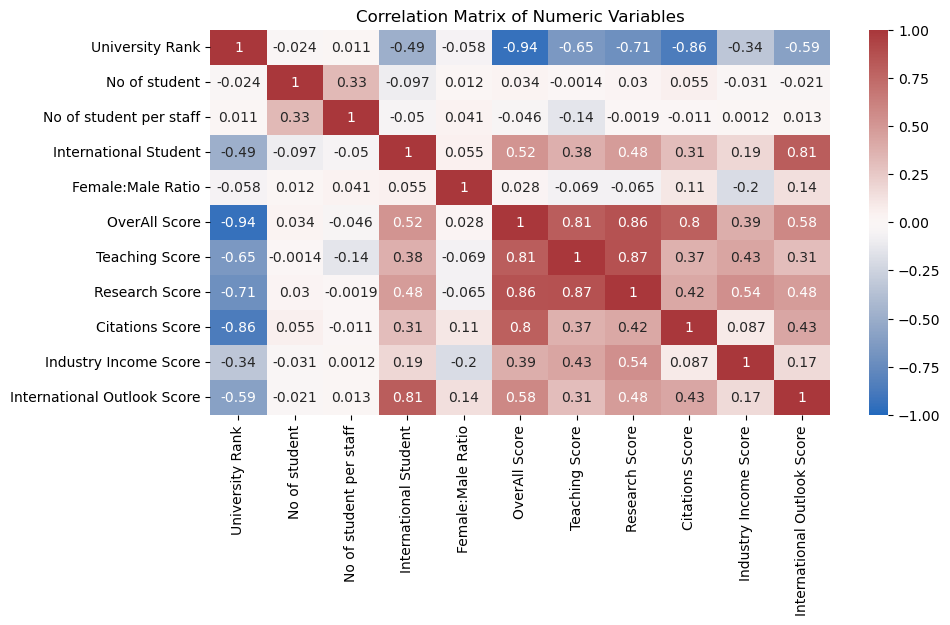

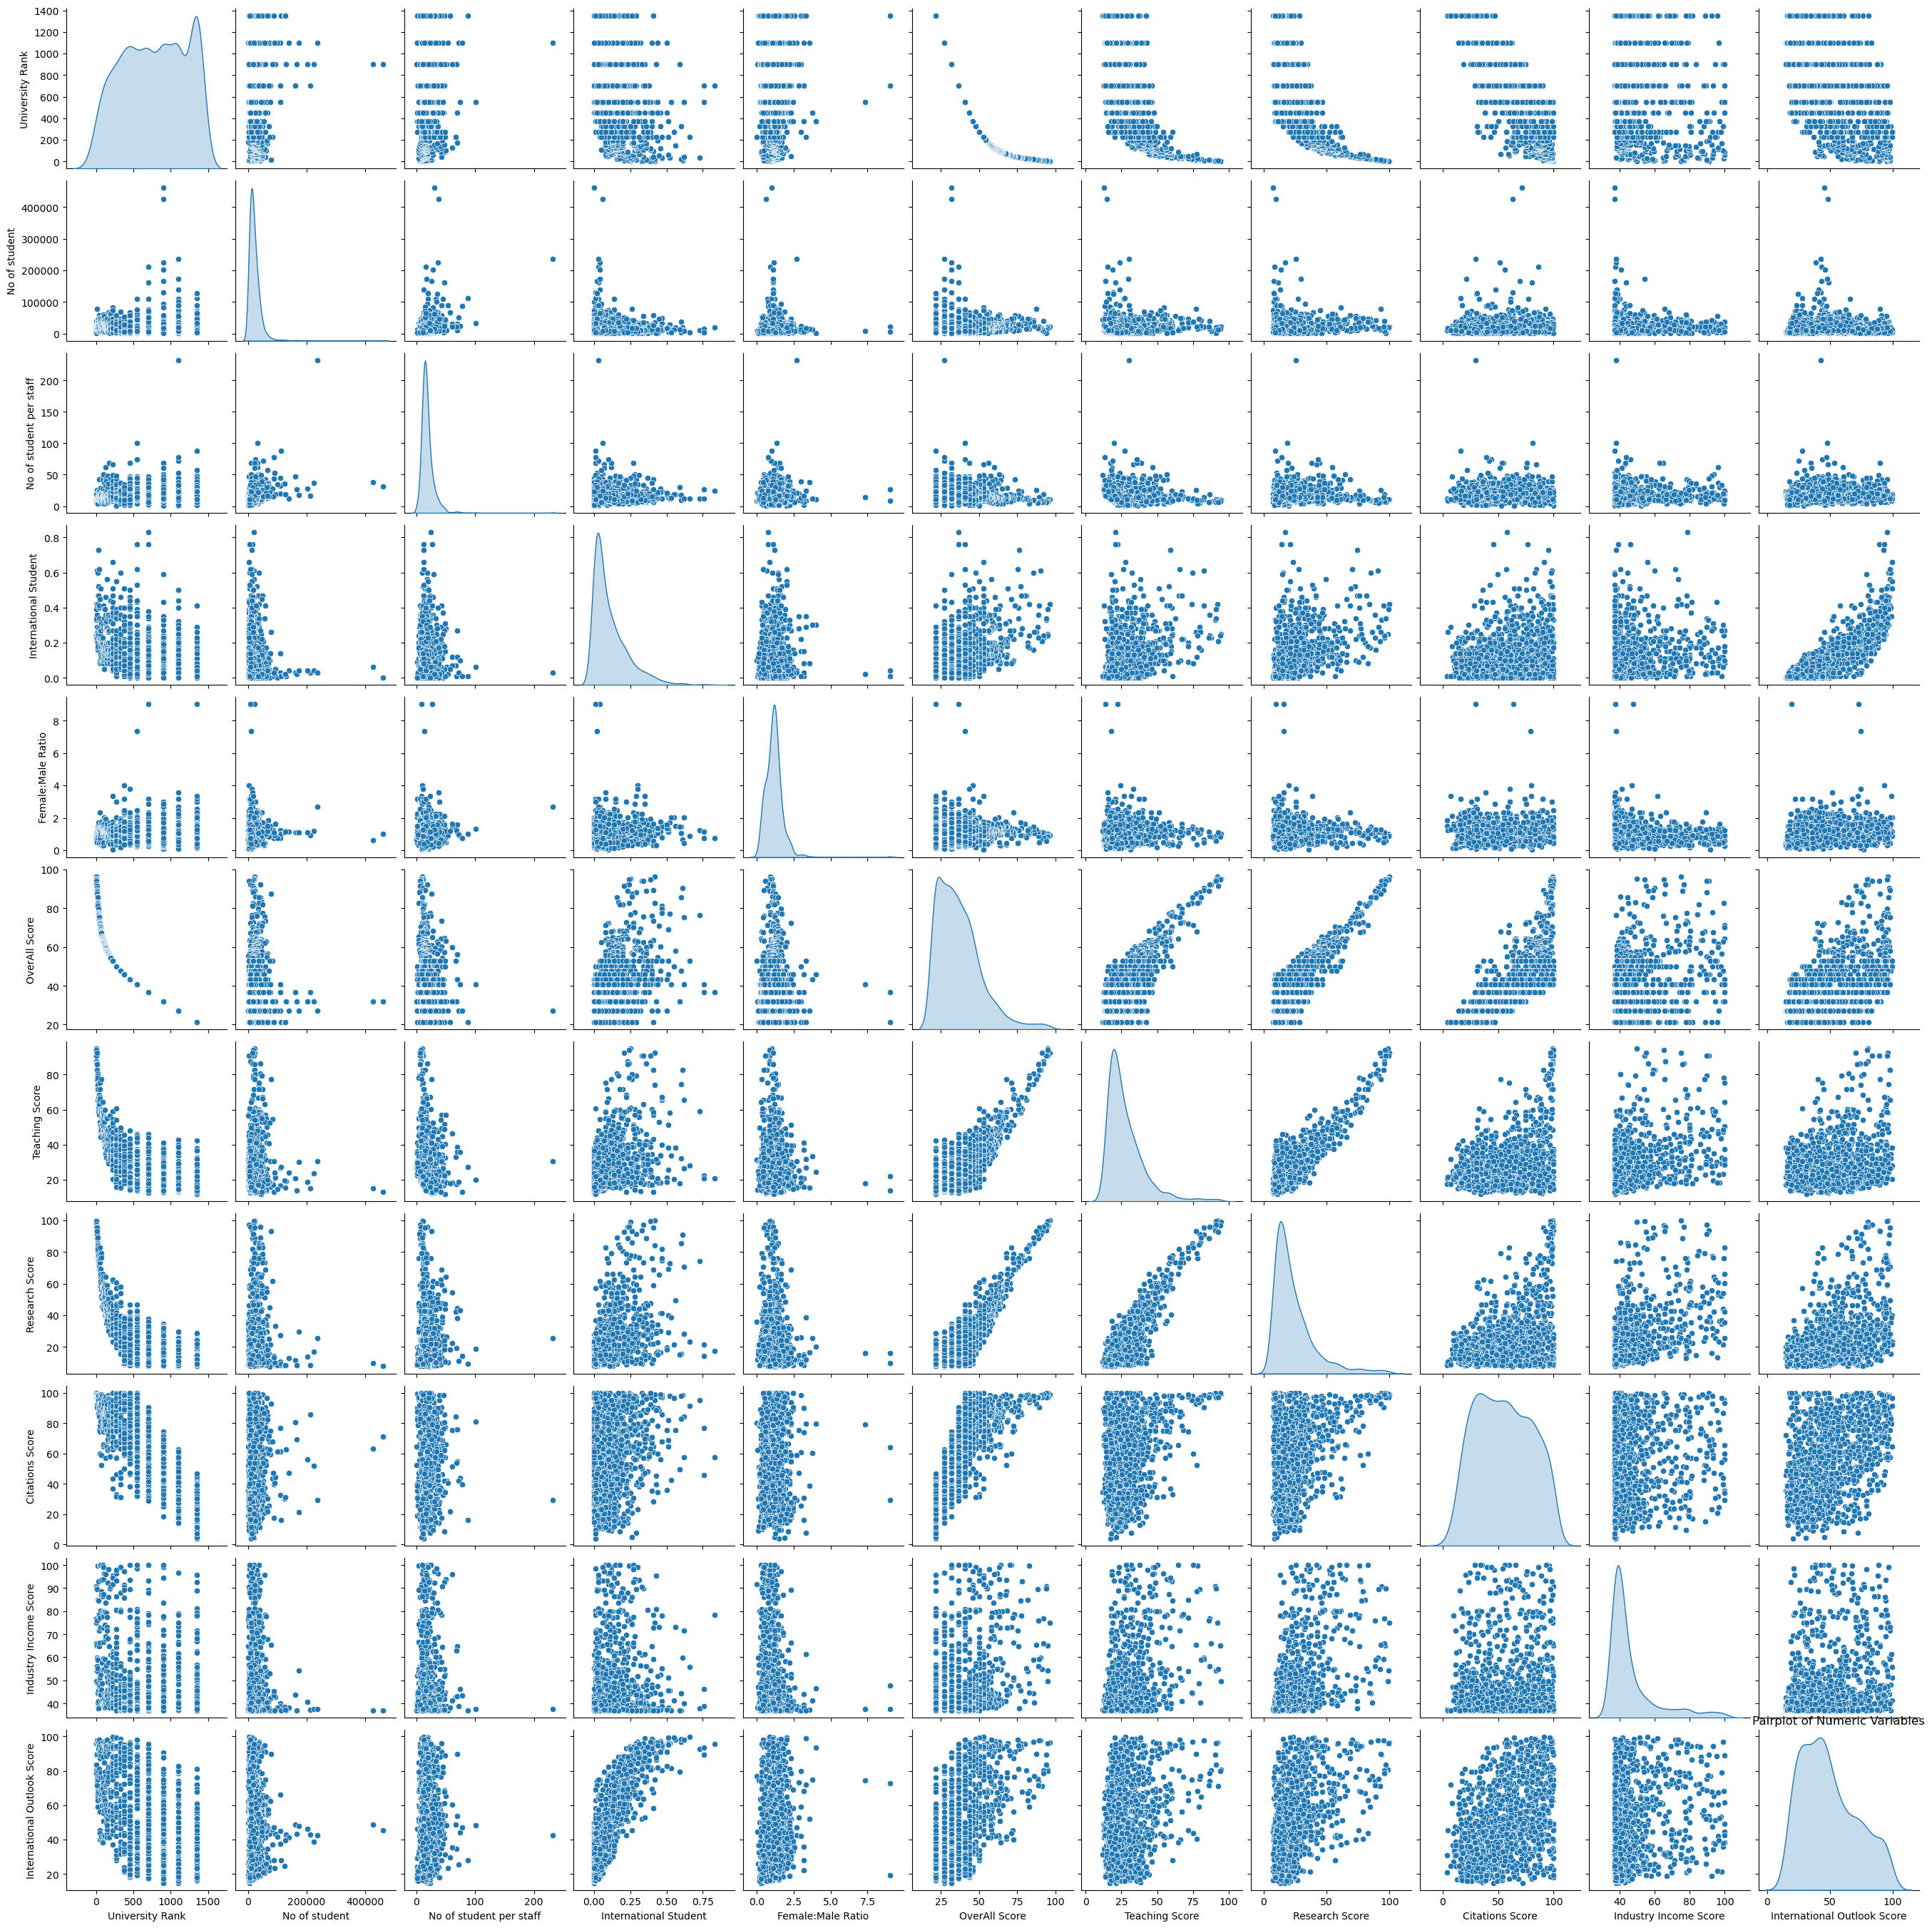

In [17]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 5))
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, vmin=-1,vmax=1,cmap="vlag",center=0,annot=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Pairplot to visualize pairwise relationships for numeric variables
sns.pairplot(data[numeric_cols], diag_kind='kde')
plt.title('Pairplot of Numeric Variables')
plt.show()

## Hypothesis
### Correlations
Too high correlations  
* Overall Score x Research Score x Teaching Score
    * Overall Score x Research Score (0.94)
    * Overal Score X Teaching Score (0.92)
    * Teaching Score x Reserach Score (0.88)
* Ranking x Overal Score x Teaching Score x Research Score
    * Ranking x Overall Score (-0.93)
    * Ranking x Teaching Score (-0.85)
    * Ranking x Research Score (-0.9)
* International Student x International Outlook Score (0.81)

Acceptable Correlations
* Ranking x International Student x Citation Score
    * Ranking x International Student (-0.33)
    * Ranking x Citation Score (-0.43)
* Number of Students x Number of student per staff x International Students x Female:Male Ratio x Research Score 
    * Number of students x Number of studetns per staff (-0.46)
    * Number of students x International Students (-0.31)
    * Number of students x Female:Male Ratio (0.67)
    * Number of students x reseach score (-0.39)
* International Students x Overall score x Teaching Score x Research Score x Citation Score
    * x overall score (0.36)
    * x teaching score (0.42)

this "acceptable correlations" list is stupid AHAHAHAHAH

----

### 2.  Use Seaborn to explore the numeric data graphically. Two goals here. First, are there any variables that are highly correlated with each other.  Second, are there any variables that seem likely to be helpful in building a model that can predict heart disease. Write your hypothesis in the markdown box provided.  

## Hypothesis on Numeric Data Relationships and Predictive Variables

Based on the graphical analysis, a notable **negative correlation** was observed between **MaxHR** (maximum heart rate achieved) and **Age**, with a correlation coefficient of -0.39. This inverse relationship might be significant in understanding heart disease risk.

Among other numeric variables, **Oldpeak** (ST depression induced by exercise relative to rest) and **Ca** (number of major vessels colored by fluoroscopy) show promise as predictors for heart disease. Their distinct patterns in the data suggest potential utility in a predictive model.

Thus, the hypothesis is that a logistic regression model incorporating Age, MaxHR, Oldpeak, and Ca could effectively predict the presence of heart disease, leveraging both demographic and physiological factors.

### 3. As the analysis plan is to use a Logistic Regression model, all variables will need to be converted to numeric representations. One way to do this is `pd.get_dummies` which I give an example below. The other way to do it is to use .map method and define an encoder. 


In [103]:
# Convert ordinal variables using the .map method
data['ChestPain'] = data['ChestPain'].astype("category").cat.set_categories(chest_pain_order, ordered=True).cat.codes
data['Thal'] = data['Thal'].astype("category").cat.set_categories(thal_order, ordered=True).cat.codes

# Encode nominal categorical variables using pd.get_dummies
data_encoded = pd.get_dummies(data, columns=['Sex', 'Fbs', 'RestECG', 'ExAng', 'Slope', 'Ca'], drop_first=True)

# Drop first column (unnecessary)
data_encoded.drop('Unnamed: 0', axis=1, inplace=True)

# Encoding the target variable 'AHD'
data_encoded['AHD'] = data_encoded['AHD'].map({'No': 0, 'Yes': 1})

# Applying StandardScaler to numeric columns
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(data_encoded.drop('AHD', axis=1)), columns=data_encoded.drop('AHD', axis=1).columns)
y = data_encoded['AHD']

### 4. We are going to have to decide how we want to cross-validate the models we build. First split the data into training and test data (using `train_test_split`). I recommend 25% test set data.   Then using the training data only, make use of K-fold cross validation to create multiple training and test sets. I recommend doing 5-folds.    

In [104]:
from sklearn.model_selection import train_test_split, KFold

# Split data into training and test sets (25% test data as recommended)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# Initialize KFold with 5 splits, shuffle the data, and set a random state for reproducibility
kf = KFold(n_splits=5, shuffle=True, random_state=42)


### 5. Fit a logistic regression model on the training data using K-fold cross-validation to first assess model fit. Your assessment should include accuracy, confusion matrix, and ROC curve.     

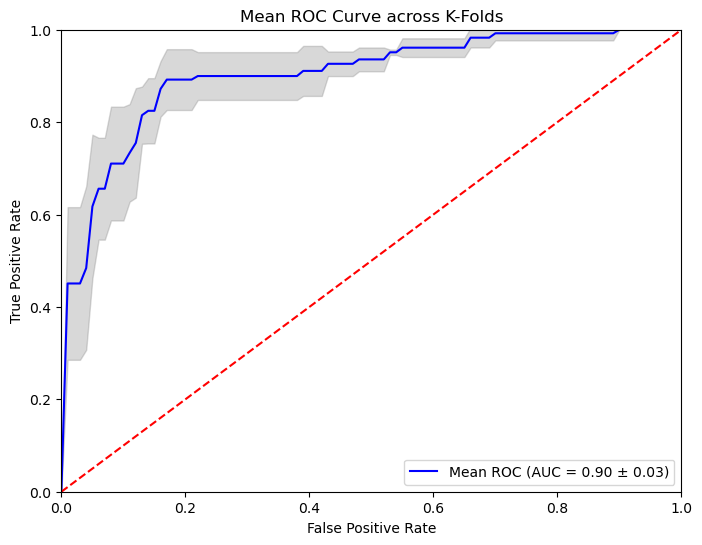

Average Accuracy across folds: 0.83
Confusion Matrices for each fold:
Fold 1:
[[26  0]
 [ 6 13]]

Fold 2:
[[16  3]
 [ 7 19]]

Fold 3:
[[20  6]
 [ 2 16]]

Fold 4:
[[20  3]
 [ 3 18]]

Fold 5:
[[20  4]
 [ 3 17]]



In [105]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=1000)

# Lists to store metrics for each fold
acc_scores = []
conf_matrices = []
roc_auc_scores = []
tprs = []
base_fpr = np.linspace(0, 1, 101)

# K-Fold Cross-Validation
for train_index, val_index in kf.split(X_train):
    # Split data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Fit the model and make predictions
    logreg.fit(X_train_fold, y_train_fold)
    y_pred = logreg.predict(X_val_fold)
    
    # Calculate accuracy and confusion matrix
    acc_scores.append(accuracy_score(y_val_fold, y_pred))
    conf_matrices.append(confusion_matrix(y_val_fold, y_pred))
    
    # Calculate ROC AUC
    y_pred_proba = logreg.predict_proba(X_val_fold)[:, 1]
    fpr, tpr, _ = roc_curve(y_val_fold, y_pred_proba)
    roc_auc = roc_auc_score(y_val_fold, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    
    # Interpolate ROC curve
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)

# Calculate mean and standard deviation of ROC AUC scores
mean_auc = np.mean(roc_auc_scores)
std_auc = np.std(roc_auc_scores)
mean_tprs = np.array(tprs).mean(axis=0)
std_tprs = np.array(tprs).std(axis=0)

# Plot Mean ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(base_fpr, mean_tprs, 'b', label='Mean ROC (AUC = {:.2f} ± {:.2f})'.format(mean_auc, std_auc))
plt.fill_between(base_fpr, mean_tprs - std_tprs, mean_tprs + std_tprs, color='grey', alpha=0.3)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mean ROC Curve across K-Folds')
plt.legend(loc='lower right')
plt.show()

# Print Average Accuracy and Confusion Matrices
print(f"Average Accuracy across folds: {np.mean(acc_scores):.2f}")
print("Confusion Matrices for each fold:")
for i, cm in enumerate(conf_matrices, 1):
    print(f"Fold {i}:\n{cm}\n")




### 6. Fit a logistic regression model using all the training data and test it on the test data.  Provide accuracy, confusion matrix, and ROC curve.

Accuracy on test data: 0.89
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.88      0.90        42
           1       0.86      0.91      0.88        33

    accuracy                           0.89        75
   macro avg       0.89      0.90      0.89        75
weighted avg       0.90      0.89      0.89        75

Confusion Matrix on test data:
[[37  5]
 [ 3 30]]


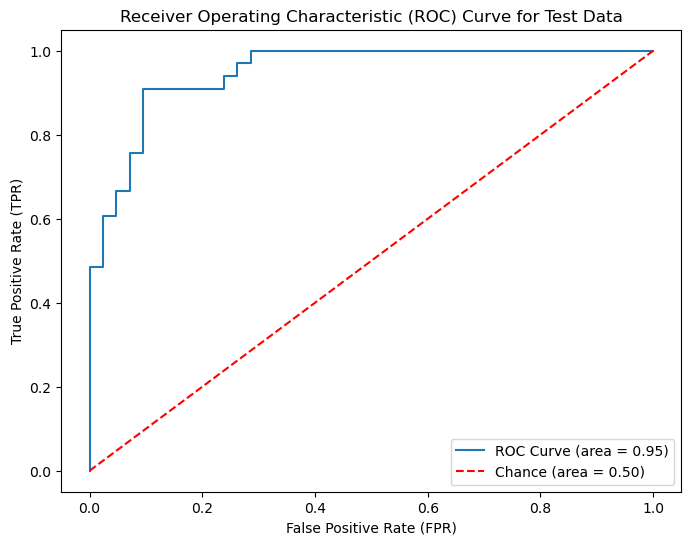

In [106]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score

# Fit the logistic regression model on the entire training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred_test = logreg.predict(X_test)
y_pred_proba_test = logreg.predict_proba(X_test)[:, 1]

# Calculate accuracy
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on test data: {accuracy_test:.2f}")

# Generate and print a classification report
class_report = classification_report(y_test, y_pred_test)
print("Classification Report:\n", class_report)

# Calculate and print the confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print(f"Confusion Matrix on test data:\n{conf_matrix_test}")

# Calculate ROC curve and AUC
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = roc_auc_score(y_test, y_pred_proba_test)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, label=f'ROC Curve (area = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Chance (area = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Test Data')
plt.legend(loc="lower right")
plt.show()


### 7. Examine your model to determine if you can understand what features and criterion it is using to classify the data. Write your descriptive answer in the markdown box.   

## Model Interpretation

The logistic regression model classifies data for heart disease prediction based on a set of features, each weighted by a coefficient that signifies its impact. The model uses these criteria:

**Coefficients as Criteria**: 

Each feature's coefficient indicates its influence on the probability of having heart disease. Positive coefficients increase the likelihood, while negative ones decrease it.



**Key Influential Features**:

*Ca_2.0 (1.63)*: Strong positive influence, indicating higher risk with 2 major vessels detected.

*Ca_1.0 (1.52)* and Ca_3.0 (1.15): Similar influence, with an increasing number of vessels indicating higher risk.

*Sex_1 (1.11)*: Suggests males are at higher risk.



**Secondary Features**:

*Negative Thal Coefficient*: Indicates that certain thalassemia conditions might inversely relate to heart disease risk.
*Oldpeak and ExAng_1*: Show a positive relationship with heart disease presence.

The model classifies a patient as more likely to have heart disease when the sum of these weighted features is higher. This classification criterion, rooted in the coefficients, provides a clear indication of which factors are considered significant by the model in predicting heart disease.
